In [1]:
# grafics.py

import pandas as pd
import seaborn as sns

In [48]:
dados = pd.read_csv("../all.csv")
dados.Score = dados.Score.str.replace(',', '.').astype(float)
dados.Benchmark = dados.Benchmark.str.removeprefix("jv.microbenchmark.runners.")
dados["Class"] = dados.Benchmark.str.split("Runner.").str[0]
dados["Benchmark"] = dados.Benchmark.str.split("Runner.").str[1]
dados.dropna(subset = ['Score'], inplace=True) 
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 978
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Benchmark                  884 non-null    object 
 1   Mode                       884 non-null    object 
 2   Threads                    884 non-null    int64  
 3   Samples                    884 non-null    int64  
 4   Score                      884 non-null    float64
 5   Score Error (99,9%)        692 non-null    object 
 6   Unit                       884 non-null    object 
 7   Param: param               884 non-null    object 
 8   Param: stringManipulation  884 non-null    object 
 9   Class                      884 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 76.0+ KB


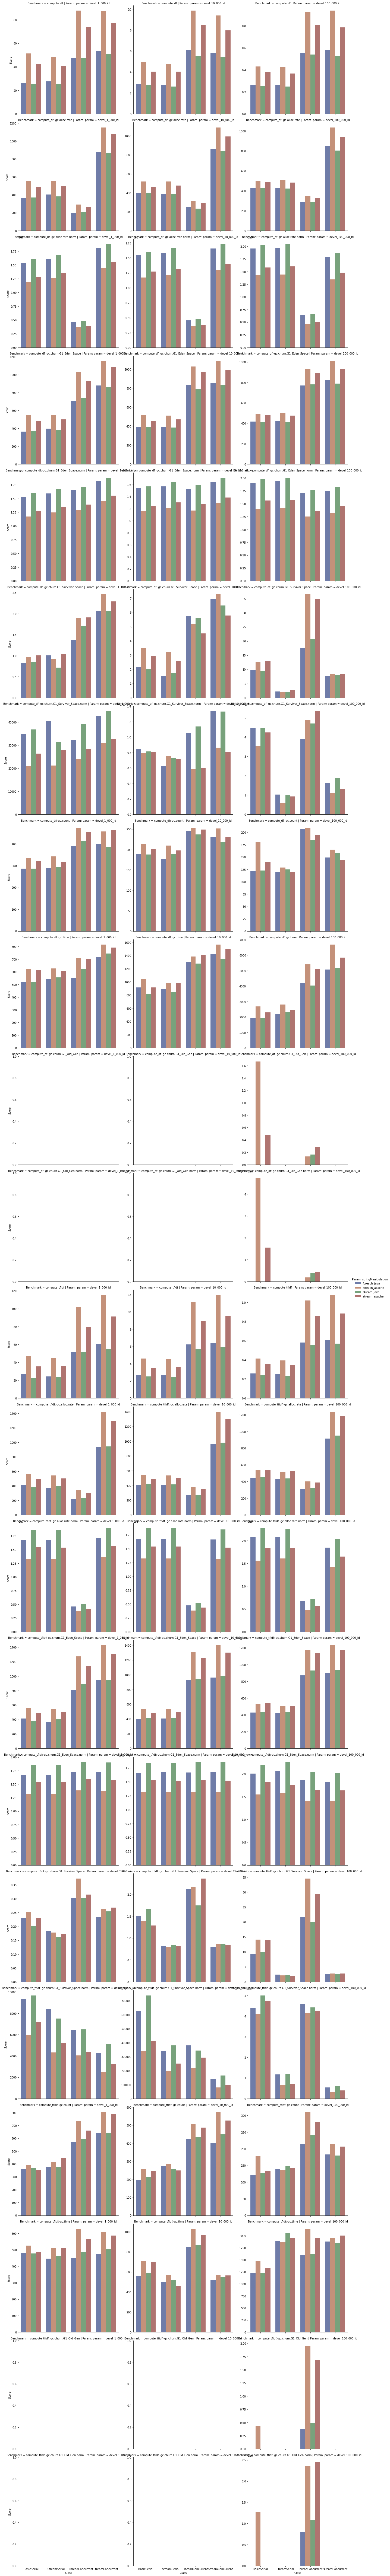

In [75]:
g = sns.catplot(
    data=dados, kind="bar", col="Param: param", row="Benchmark",
    x="Class", y="Score", hue="Param: stringManipulation",
    ci="sd", palette="dark", alpha=.6, height=6, sharey=False,
    order=['BasicSerial', 'StreamSerial', 'ThreadConcurrent', 'StreamConcurrent']
)